<h1 style="color:#3498DB">Transfer Learning Cats Dogs</h1>

In [1]:
import os
import math
import zipfile
import warnings
import random
import wget
import datetime

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import TensorBoard

%matplotlib inline
%load_ext tensorboard
warnings.filterwarnings('ignore')

<h3 style=color:#3498DB>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h1 style="color:#3498DB">Download The Data Archive File</h1>

In [ ]:
# !wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [8]:
wget.download('https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', 'tmp_transfer\\')

100% [........................................................................] 68606236 / 68606236

'tmp_transfer\\/cats_and_dogs_filtered.zip'

<h1 style="color:#3498DB">Extract The Data Archive</h1>

In [9]:
# Extract the archive
zip_file_name = 'tmp_transfer\\cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_file_name, 'r')
zip_ref.extractall('tmp_transfer\\')
zip_ref.close()

# Assign training and validation set directories

train_dir = os.path.join('tmp_transfer\\cats_and_dogs_filtered', 'train')
validation_dir = os.path.join('tmp_transfer\\cats_and_dogs_filtered', 'validation')

train_dir, validation_dir

('tmp_transfer\\cats_and_dogs_filtered\\train',
 'tmp_transfer\\cats_and_dogs_filtered\\validation')

<h3 style=color:#3498DB>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h1 style="color:#3498DB">Build The Model</h1>

<h2 style="color:#3498DB">Create Inception Model and download Weights file</h2>

In [ ]:
# # Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [14]:
download_http = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
wget.download(download_http, 'tmp_transfer\\')

100% [........................................................................] 87910968 / 87910968

'tmp_transfer\\/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [15]:
weights_file_location = 'tmp_transfer\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [16]:
pretrained_model = InceptionV3(
                                include_top=False,
                                input_shape=(150,150,3),
                                weights=weights_file_location)

# Freeze the weights of the layers.
for layer in pretrained_model.layers:
    layer.trainable = False

In [17]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [18]:
len(pretrained_model.layers)

311

<h2 style="color:#3498DB">Choose `mixed_7` as the last layer of your base model</h2>

In [19]:
last_layer = pretrained_model.get_layer('mixed7')

print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output
last_output

last layer output shape:  (None, 7, 7, 768)


<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'mixed7')>

<h2 style="color:#3498DB">Add dense layers</h2>

In [20]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)     

<h2 style="color:#3498DB">Append the dense network to the base model</h2>

In [21]:
model = keras.Model(pretrained_model.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [22]:
len(model.layers)

233

In [25]:
from tensorflow.keras.optimizers import RMSprop

# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                        loss = 'binary_crossentropy', 
                        metrics = ['accuracy'])

<h3 style=color:#3498DB>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h3 style="color:#3498DB">ImageDataGenerator</h3>

In [23]:
from keras.preprocessing.image import ImageDataGenerator

# Generator Objects
train_datagen = ImageDataGenerator(
                                   rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flowing from dir

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    #save_to_dir='',
                                                    save_prefix='aug'
                                                    )

validation_generator = validation_datagen.flow_from_directory(
                                                              validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=20,
                                                              class_mode='binary'
                                                              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<h3 style="color:#3498DB">Tensorboard callback class</h3>

In [26]:
project_name = 'transfer_cats_dogs'
log_dir_customized = "tmp_transfer\\logs\\"+project_name+"\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M")
Tensorboard_callback = TensorBoard(
                                   log_dir=log_dir_customized,
                                   histogram_freq=1,
                                   write_graph=True,
                                   write_images=True,
                                   write_steps_per_second=True,
                                   profile_batch=1,
                                   embeddings_freq=1,
                                   )

<h3 style="color:#3498DB">Create a model object and train it</h3>

In [28]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=20,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[Tensorboard_callback]
                    )

Epoch 1/5
20/20 [==============================] - 216s 11s/step - loss: 0.2610 - accuracy: 0.8875 - val_loss: 0.1081 - val_accuracy: 0.9610
Epoch 2/5
20/20 [==============================] - 230s 12s/step - loss: 0.2022 - accuracy: 0.9175 - val_loss: 0.3046 - val_accuracy: 0.8930
Epoch 3/5
20/20 [==============================] - 226s 12s/step - loss: 0.2317 - accuracy: 0.8975 - val_loss: 0.1013 - val_accuracy: 0.9640
Epoch 4/5
20/20 [==============================] - 235s 12s/step - loss: 0.2063 - accuracy: 0.9250 - val_loss: 0.1122 - val_accuracy: 0.9590
Epoch 5/5
20/20 [==============================] - 242s 13s/step - loss: 0.1813 - accuracy: 0.9375 - val_loss: 0.1337 - val_accuracy: 0.9520


In [ ]:
# %tensorboard --logdir tmp_transfer/logs/Augmentation_cats_dogs

<h3 style=color:#3498DB>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h3 style="color:#3498DB">Plot Loss and Accuracy</h3>

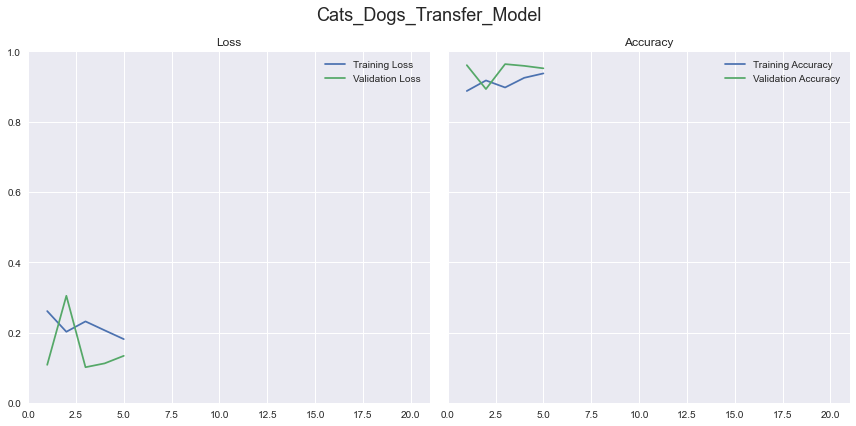

In [29]:
ModelName = 'Cats_Dogs_Transfer_Model'

def plot_loss_accuracy(modelhistory, modelname):
    
    loss     = modelhistory.history['loss']
    val_loss = modelhistory.history['val_loss']
    acc      = modelhistory.history['accuracy']
    val_acc  = modelhistory.history['val_accuracy']

    epochs   = range(1,len(acc)+1) # Get number of epochs

    plt.style.use('seaborn')
    
    # Create Subplots System
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

    # Change Figure Size
    fig.set_size_inches(12, 6)

    # Fig Name
    fig.suptitle(modelname, fontsize=18)
    
    # First Axies
    ax1.plot(epochs, loss, label="Training Loss")
    ax1.plot(epochs, val_loss, label="Validation Loss")
    ax1.set_title('Loss')
    ax1.set_xlim(0,21.0)
    ax1.set_ylim(0,1.0)
    ax1.legend()

    # Second Axies
    ax2.plot(epochs, acc, label="Training Accuracy")
    ax2.plot(epochs, val_acc, label="Validation Accuracy")
    ax2.set_title('Accuracy')
    ax2.set_xlim(0,21.0)
    ax2.legend()

    # Change Padding to Tight
    plt.tight_layout()

    # Show The Figure
    plt.show()

    # Save The Figure To JPG File
    fig.savefig('tmp_transfer\\'+modelname+'.jpg')
    
plot_loss_accuracy(history, ModelName)

<h3 style="color:#3498DB">Save Model To h5 File</h3>

In [30]:
model.save('tmp_transfer\\'+ModelName+'.h5')

<h3 style=color:#3498DB>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h1 style="color:#3498DB">Test The Model</h1>

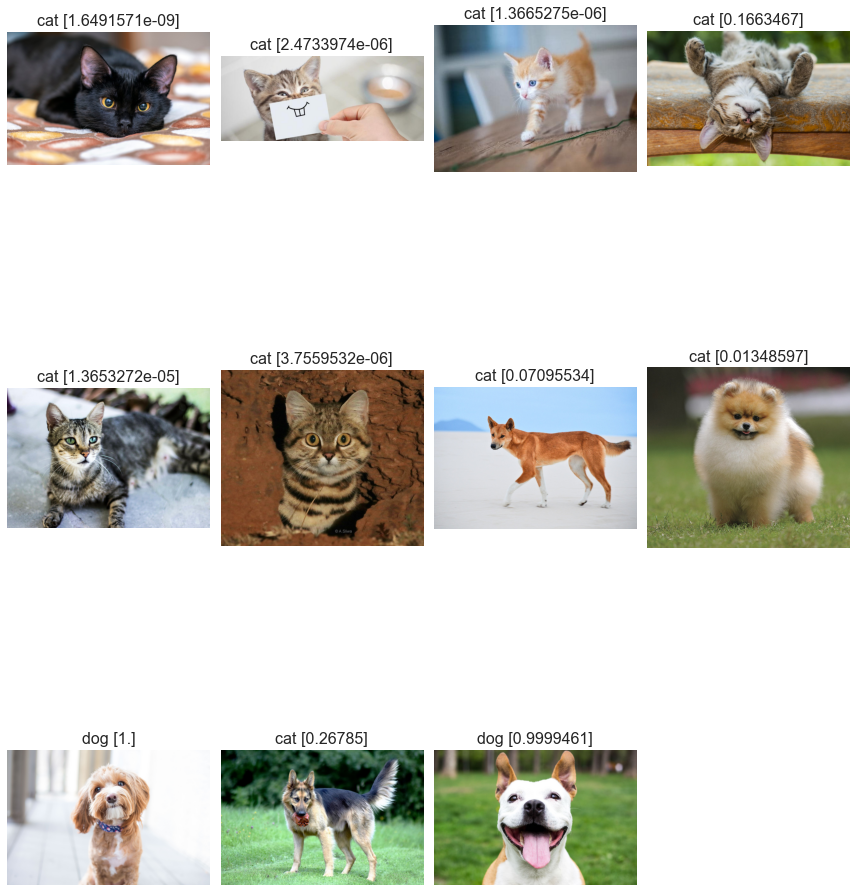

In [31]:
allimgs = [os.path.join('tmp_transfer\\cats_dogs_test_imgs', im) for im in os.listdir('tmp_transfer\\cats_dogs_test_imgs')]

def testcurrentimg(x):
    
    ImgPath = allimgs[x]

    img = load_img(ImgPath, target_size=(150, 150))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    image = np.vstack([x])

    classes = model.predict(image)

    if classes[0] > 0.5:
        return(f'dog {classes[0]}')
    else:
        return(f'cat {classes[0]}')


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = math.ceil(len(allimgs)/4)

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(nrows*4, 16)

for i, img_path in enumerate(allimgs):
    
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, 4, i + 1)
    
    sp.axis('Off') # Don't show axes (or gridlines)

    plt.title(testcurrentimg(i), fontsize=16)
    plt.imshow(mpimg.imread(img_path))

# Change Padding to Tight
plt.tight_layout()

plt.show()